In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.optimizers import *
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tqdm import tqdm
import random
#from tf.keras.layersConvLSTM1D
physical_devices = tf.config.list_physical_devices('GPU') 
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.__version__)

Num GPUs Available:  1
2.2.0


In [12]:

# seed for reproducing same results
seed = 9
np.random.seed(seed)
norm ='Normalized_feature_full.csv'
raw ="feature_full.csv"
less= 'lessSmote.csv'
# load pima indians dataset
dataset = np.loadtxt(less, delimiter=',', skiprows=1)

# split into input and output variables
X = dataset[:, 0:-1]
Y = dataset[:,-1]

(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.2, random_state=seed)
for i in range(len(Y_train)):
    Y_train[i] = int(Y_train[i])-1
    
for i in range(len(Y_test)):
    Y_test[i] = int(Y_test[i])-1
    
from tensorflow.keras.utils import to_categorical
Y_test = to_categorical(Y_test)
print(Y_test)
Y_train = to_categorical(Y_train)
print(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train=Y_train
y_test=Y_test

[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


In [13]:
red_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1,mode='auto', min_delta=0.01,min_lr=0.0001)
old = 0
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}):
            global old
            if(logs.get('val_acc') > old):
                model.save('NF_Conv1D.h5',overwrite=True)
                old = logs.get('val_acc')
saver =myCallback()
                
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(16, (5),activation='relu',strides =1,padding="same", input_shape=[21,1]),
    tf.keras.layers.LSTM(128,return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='softmax')
    ])
model.compile(optimizer='nadam'  ,loss='categorical_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=8192,verbose =1)#, callbacks = [red_lr])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 21, 16)            96        
_________________________________________________________________
lstm_4 (LSTM)                (None, 21, 128)           74240     
_________________________________________________________________
flatten_4 (Flatten)          (None, 2688)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 10756     
Total params: 85,092
Trainable params: 85,092
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
12/12 [==============================] - 1s 117ms/step - loss: 0.9019 - acc: 0.6702 - val_loss: 0.7686 - val_acc: 0.7326
Epoch 2/200
12/12 [==============================] - 1s 81ms/step - loss: 0.7092 - acc: 0.7504 - val_loss: 0.6762 -

12/12 [==============================] - 1s 82ms/step - loss: 0.3672 - acc: 0.8635 - val_loss: 0.3772 - val_acc: 0.8563
Epoch 57/200
12/12 [==============================] - 1s 82ms/step - loss: 0.3592 - acc: 0.8674 - val_loss: 0.3779 - val_acc: 0.8549
Epoch 58/200
12/12 [==============================] - 1s 82ms/step - loss: 0.3651 - acc: 0.8639 - val_loss: 0.3832 - val_acc: 0.8641
Epoch 59/200
12/12 [==============================] - 1s 83ms/step - loss: 0.3650 - acc: 0.8654 - val_loss: 0.3925 - val_acc: 0.8596
Epoch 60/200
12/12 [==============================] - 1s 82ms/step - loss: 0.3607 - acc: 0.8684 - val_loss: 0.3715 - val_acc: 0.8626
Epoch 61/200
12/12 [==============================] - 1s 82ms/step - loss: 0.3592 - acc: 0.8682 - val_loss: 0.3673 - val_acc: 0.8628
Epoch 62/200
12/12 [==============================] - 1s 82ms/step - loss: 0.3604 - acc: 0.8678 - val_loss: 0.3747 - val_acc: 0.8561
Epoch 63/200
12/12 [==============================] - 1s 82ms/step - loss: 0.3650 

Epoch 178/200
12/12 [==============================] - 1s 81ms/step - loss: 0.3140 - acc: 0.8905 - val_loss: 0.3775 - val_acc: 0.8631
Epoch 179/200
12/12 [==============================] - 1s 82ms/step - loss: 0.3179 - acc: 0.8898 - val_loss: 0.3224 - val_acc: 0.8861
Epoch 180/200
12/12 [==============================] - 1s 83ms/step - loss: 0.3162 - acc: 0.8916 - val_loss: 0.3310 - val_acc: 0.8854
Epoch 181/200
12/12 [==============================] - 1s 81ms/step - loss: 0.3058 - acc: 0.8963 - val_loss: 0.3171 - val_acc: 0.8913
Epoch 182/200
12/12 [==============================] - 1s 82ms/step - loss: 0.2967 - acc: 0.9008 - val_loss: 0.3138 - val_acc: 0.8898
Epoch 183/200
12/12 [==============================] - 1s 82ms/step - loss: 0.3003 - acc: 0.8959 - val_loss: 0.3147 - val_acc: 0.8936
Epoch 184/200
12/12 [==============================] - 1s 82ms/step - loss: 0.2941 - acc: 0.9004 - val_loss: 0.3110 - val_acc: 0.8939
Epoch 185/200
12/12 [==============================] - 1s 81ms

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


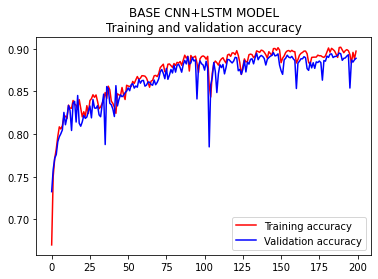

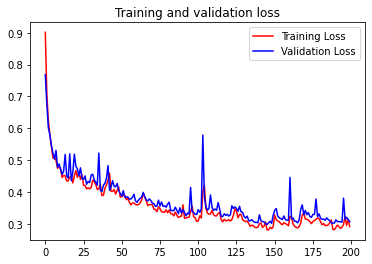

average_accuracy= 0.8642848023772239
precision= 0.8954062461853027
average_loss= 0.37300713315606115


In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('BASE CNN+LSTM MODEL\nTraining and validation accuracy')
plt.savefig('./images/FIG_4/A1.eps', format='eps',dpi=1000)
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('./images/FIG_4/A2.eps', format='eps',dpi=1000)
plt.show()
average_accuracy=sum(history.history['val_acc'])/len(history.history['val_acc'])
precision = max(history.history['val_acc'])
print("average_accuracy=",average_accuracy)
print("precision=",precision)
average_loss=sum(history.history['val_loss'])/len(history.history['val_loss'])
print("average_loss=",average_loss)


In [15]:
red_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1,mode='auto', min_delta=0.01,min_lr=0.0001)
old =0
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}):
            global old
            if(logs.get('val_acc') > old):
                model.save('NF_LocallyConnected1D.h5',overwrite=True)
                old = logs.get('val_acc')
saver =myCallback()

model = tf.keras.models.Sequential([
    tf.keras.layers.LocallyConnected1D(16, (5),activation='relu',strides =1,padding="valid", input_shape=[21,1]),
    tf.keras.layers.LSTM(128,return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='softmax')
    ])
model.compile(optimizer='nadam'  ,loss='categorical_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=8192,verbose =1)#, callbacks = [red_lr])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
locally_connected1d_3 (Local (None, 17, 16)            1632      
_________________________________________________________________
lstm_5 (LSTM)                (None, 17, 128)           74240     
_________________________________________________________________
flatten_5 (Flatten)          (None, 2176)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 8708      
Total params: 84,580
Trainable params: 84,580
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
12/12 [==============================] - 2s 130ms/step - loss: 1.0050 - acc: 0.6030 - val_loss: 0.8072 - val_acc: 0.7372
Epoch 2/200
12/12 [==============================] - 1s 70ms/step - loss: 0.7332 - acc: 0.7464 - val_loss: 0.6819 -

12/12 [==============================] - 1s 71ms/step - loss: 0.3070 - acc: 0.8869 - val_loss: 0.3193 - val_acc: 0.8873
Epoch 57/200
12/12 [==============================] - 1s 70ms/step - loss: 0.3124 - acc: 0.8904 - val_loss: 0.3411 - val_acc: 0.8753
Epoch 58/200
12/12 [==============================] - 1s 70ms/step - loss: 0.3515 - acc: 0.8744 - val_loss: 0.3306 - val_acc: 0.8790
Epoch 59/200
12/12 [==============================] - 1s 70ms/step - loss: 0.3123 - acc: 0.8891 - val_loss: 0.3335 - val_acc: 0.8786
Epoch 60/200
12/12 [==============================] - 1s 70ms/step - loss: 0.3172 - acc: 0.8858 - val_loss: 0.3249 - val_acc: 0.8870
Epoch 61/200
12/12 [==============================] - 1s 70ms/step - loss: 0.3198 - acc: 0.8843 - val_loss: 0.3369 - val_acc: 0.8786
Epoch 62/200
12/12 [==============================] - 1s 70ms/step - loss: 0.3072 - acc: 0.8906 - val_loss: 0.3200 - val_acc: 0.8866
Epoch 63/200
12/12 [==============================] - 1s 70ms/step - loss: 0.3037 

12/12 [==============================] - 1s 70ms/step - loss: 0.2765 - acc: 0.8970 - val_loss: 0.3044 - val_acc: 0.8916
Epoch 179/200
12/12 [==============================] - 1s 70ms/step - loss: 0.2734 - acc: 0.8982 - val_loss: 0.2849 - val_acc: 0.8941
Epoch 180/200
12/12 [==============================] - 1s 69ms/step - loss: 0.2662 - acc: 0.9020 - val_loss: 0.2847 - val_acc: 0.8943
Epoch 181/200
12/12 [==============================] - 1s 69ms/step - loss: 0.2778 - acc: 0.8979 - val_loss: 0.3243 - val_acc: 0.8895
Epoch 182/200
12/12 [==============================] - 1s 70ms/step - loss: 0.2767 - acc: 0.8986 - val_loss: 0.2861 - val_acc: 0.8940
Epoch 183/200
12/12 [==============================] - 1s 70ms/step - loss: 0.2659 - acc: 0.9011 - val_loss: 0.2813 - val_acc: 0.8959
Epoch 184/200
12/12 [==============================] - 1s 71ms/step - loss: 0.2634 - acc: 0.9030 - val_loss: 0.2822 - val_acc: 0.8943
Epoch 185/200
12/12 [==============================] - 1s 71ms/step - loss: 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


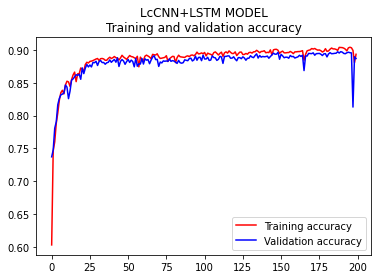

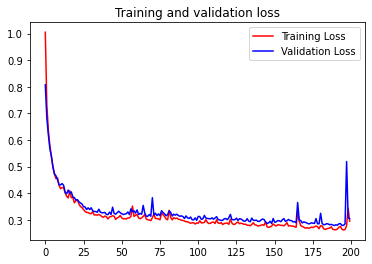

average_accuracy= 0.8805915021896362
precision= 0.8975055813789368
average_loss= 0.32834982842206956


In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('LcCNN+LSTM MODEL\nTraining and validation accuracy')
plt.savefig('./images/FIG_4/B1.eps', format='eps',dpi=1000)
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('./images/FIG_4/B2.eps', format='eps',dpi=1000)
plt.show()
average_accuracy=sum(history.history['val_acc'])/len(history.history['val_acc'])
precision = max(history.history['val_acc'])
print("average_accuracy=",average_accuracy)
print("precision=",precision)
average_loss=sum(history.history['val_loss'])/len(history.history['val_loss'])
print("average_loss=",average_loss)


In [17]:
red_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1,mode='auto', min_delta=0.01,min_lr=0.0001)
old =0
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}):
            global old
            if(logs.get('val_acc') > old):
                model.save('NF_LocallyConnected1D.h5',overwrite=True)
                old = logs.get('val_acc')
saver =myCallback()
#88.92
model = tf.keras.models.Sequential([
    tf.keras.layers.LocallyConnected1D(16, (5),activation='relu',strides =1,padding="valid", input_shape=[21,1]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True)),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(4, activation='softmax')
    ])
model.compile(optimizer='nadam'  ,loss='categorical_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=1000,verbose =1)#, callbacks = [red_lr,saver])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
locally_connected1d_4 (Local (None, 17, 16)            1632      
_________________________________________________________________
bidirectional_2 (Bidirection (None, 17, 256)           148480    
_________________________________________________________________
flatten_6 (Flatten)          (None, 4352)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 17412     
Total params: 167,524
Trainable params: 167,524
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
98/98 [==============================] - 3s 32ms/step - loss: 0.5975 - acc: 0.7776 - val_loss: 0.5269 - val_acc: 0.8057
Epoch 2/200
98/98 [==============================] - 2s 25ms/step - loss: 0.4348 - acc: 0.8414 - val_loss: 0.4248 

98/98 [==============================] - 3s 26ms/step - loss: 0.2530 - acc: 0.9067 - val_loss: 0.2804 - val_acc: 0.8944
Epoch 57/200
98/98 [==============================] - 2s 25ms/step - loss: 0.2532 - acc: 0.9066 - val_loss: 0.3055 - val_acc: 0.8913
Epoch 58/200
98/98 [==============================] - 2s 25ms/step - loss: 0.2588 - acc: 0.9052 - val_loss: 0.3384 - val_acc: 0.8815
Epoch 59/200
98/98 [==============================] - 2s 25ms/step - loss: 0.2593 - acc: 0.9043 - val_loss: 0.3279 - val_acc: 0.8843
Epoch 60/200
98/98 [==============================] - 2s 25ms/step - loss: 0.2529 - acc: 0.9076 - val_loss: 0.2771 - val_acc: 0.9005
Epoch 61/200
98/98 [==============================] - 2s 25ms/step - loss: 0.2486 - acc: 0.9090 - val_loss: 0.3019 - val_acc: 0.8896
Epoch 62/200
98/98 [==============================] - 2s 25ms/step - loss: 0.2514 - acc: 0.9074 - val_loss: 0.2983 - val_acc: 0.8938
Epoch 63/200
98/98 [==============================] - 2s 25ms/step - loss: 0.2485 

98/98 [==============================] - 2s 25ms/step - loss: 0.2198 - acc: 0.9188 - val_loss: 0.2550 - val_acc: 0.9083
Epoch 179/200
98/98 [==============================] - 2s 25ms/step - loss: 0.2216 - acc: 0.9185 - val_loss: 0.2646 - val_acc: 0.9043
Epoch 180/200
98/98 [==============================] - 2s 25ms/step - loss: 0.2187 - acc: 0.9189 - val_loss: 0.2482 - val_acc: 0.9094
Epoch 181/200
98/98 [==============================] - 2s 25ms/step - loss: 0.2233 - acc: 0.9179 - val_loss: 0.2589 - val_acc: 0.9053
Epoch 182/200
98/98 [==============================] - 2s 25ms/step - loss: 0.2253 - acc: 0.9170 - val_loss: 0.2511 - val_acc: 0.9075
Epoch 183/200
98/98 [==============================] - 2s 25ms/step - loss: 0.2202 - acc: 0.9189 - val_loss: 0.2607 - val_acc: 0.9070
Epoch 184/200
98/98 [==============================] - 2s 25ms/step - loss: 0.2192 - acc: 0.9194 - val_loss: 0.2668 - val_acc: 0.9036
Epoch 185/200
98/98 [==============================] - 2s 25ms/step - loss: 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


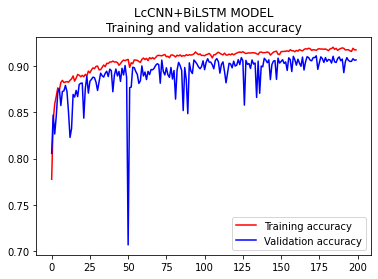

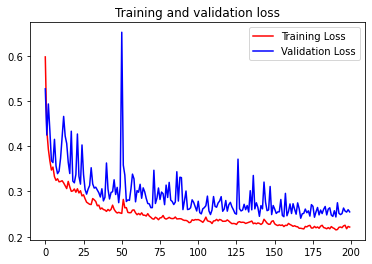

average_accuracy= 0.8924613073468208
precision= 0.9114184379577637
average_loss= 0.2940363217890263


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('LcCNN+BiLSTM MODEL\nTraining and validation accuracy')
plt.savefig('./images/FIG_4/C1.eps', format='eps',dpi=1000)
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('./images/FIG_4/C2.eps', format='eps',dpi=1000)
plt.show()
average_accuracy=sum(history.history['val_acc'])/len(history.history['val_acc'])
precision = max(history.history['val_acc'])
print("average_accuracy=",average_accuracy)
print("precision=",precision)
average_loss=sum(history.history['val_loss'])/len(history.history['val_loss'])
print("average_loss=",average_loss)


In [19]:
red_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1,mode='auto', min_delta=0.01,min_lr=0.0001)
old =0
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}):
            global old
            if(logs.get('val_acc') > old):
                model.save('NF_LocallyConnected1D.h5',overwrite=True)
                old = logs.get('val_acc')
saver =myCallback()
#88.92
model = tf.keras.models.Sequential([
    tf.keras.layers.LocallyConnected1D(16, (5),activation='relu',strides =1,padding="valid", input_shape=[21,1]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True)),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(4, activation='softmax')
    ])
model.compile(optimizer='nadam'  ,loss='categorical_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=1000,verbose =1, callbacks = [red_lr])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
locally_connected1d_5 (Local (None, 17, 16)            1632      
_________________________________________________________________
bidirectional_3 (Bidirection (None, 17, 256)           148480    
_________________________________________________________________
flatten_7 (Flatten)          (None, 4352)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 17412     
Total params: 167,524
Trainable params: 167,524
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
98/98 [==============================] - 3s 32ms/step - loss: 0.5856 - acc: 0.7877 - val_loss: 0.4679 - val_acc: 0.8297 - lr: 0.0010
Epoch 2/200
98/98 [==============================] - 2s 25ms/step - loss: 0.4289 - acc: 0.8444 - val_

Epoch 101/200
98/98 [==============================] - 2s 25ms/step - loss: 0.2272 - acc: 0.9163 - val_loss: 0.2475 - val_acc: 0.9092 - lr: 1.0000e-04
Epoch 102/200
98/98 [==============================] - 2s 25ms/step - loss: 0.2265 - acc: 0.9162 - val_loss: 0.2465 - val_acc: 0.9085 - lr: 1.0000e-04
Epoch 103/200
98/98 [==============================] - 2s 25ms/step - loss: 0.2257 - acc: 0.9171 - val_loss: 0.2470 - val_acc: 0.9099 - lr: 1.0000e-04
Epoch 104/200
98/98 [==============================] - 2s 25ms/step - loss: 0.2254 - acc: 0.9172 - val_loss: 0.2443 - val_acc: 0.9101 - lr: 1.0000e-04
Epoch 105/200
98/98 [==============================] - 2s 25ms/step - loss: 0.2248 - acc: 0.9167 - val_loss: 0.2454 - val_acc: 0.9109 - lr: 1.0000e-04
Epoch 106/200
98/98 [==============================] - 2s 25ms/step - loss: 0.2247 - acc: 0.9171 - val_loss: 0.2440 - val_acc: 0.9096 - lr: 1.0000e-04
Epoch 107/200
98/98 [==============================] - 2s 25ms/step - loss: 0.2243 - acc: 0.91

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


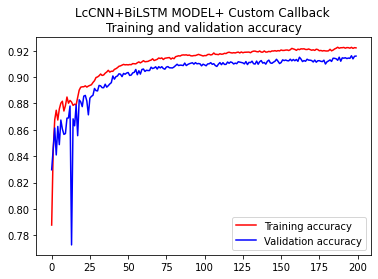

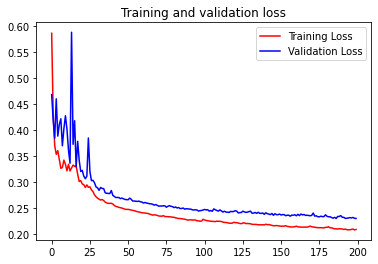

average_accuracy= 0.9023530507087707
precision= 0.9161521196365356
average_loss= 0.26623279057443144


In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('LcCNN+BiLSTM MODEL+ Custom Callback \nTraining and validation accuracy')
plt.savefig('./images/FIG_4/D1.eps', format='eps',dpi=1000)
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('./images/FIG_4/D2.eps', format='eps',dpi=1000)
plt.show()
average_accuracy=sum(history.history['val_acc'])/len(history.history['val_acc'])
precision = max(history.history['val_acc'])
print("average_accuracy=",average_accuracy)
print("precision=",precision)
average_loss=sum(history.history['val_loss'])/len(history.history['val_loss'])
print("average_loss=",average_loss)
